# A/B Testing Analysis and Parameter Definition for Text Generation

## 1. Overview of the A/B Testing Setup

As part of the A/B testing phase, it was decided that, from a single organism **TaxID**, **four different texts** would be generated based on the parameters described in **Table 1**.
Each generated text (from **Text 1 to Text 4**) corresponds to a specific combination of parameters.

By analyzing the resulting graphs (**histogram and boxplot**), it was observed that:

* **For the first option**, **Text 1** was the most frequently selected.
* **For the second option**, **Text 3** was the most frequently selected.
* It is also important to note that **Text 4 achieved a relatively high selection rate**.

---

## 2. Interpretation of User Preferences

From the users’ selections among the four generated text options for each TaxID, it was possible to observe that:

* **Texts with TopP (diversity) set to 0.1 achieved the highest overall acceptance**.
* In the case of **Option 3**, there was also a **considerable acceptance of more “creative” texts**, especially those generated with:

  * **Temperature = 0.4**
  * **TopP = 0.1**

These results suggest that:

> Physicians tend to prefer texts that are **more consistent in structure and textual organization**, while still feeling **reasonably comfortable with a limited level of creativity**, as long as it does not compromise technical rigor or clarity.

In other words, while excessive creativity can be undesirable, a small degree of variability does not necessarily reduce acceptance.

---

## 3. Qualitative Feedback from Domain Expert Interview

An interview was conducted with a target user to validate current usage patterns and gather feedback for improvement. The main findings indicate the need for:

1. A **more technical and taxonomically accurate description**, with a stronger focus on **human pathogens**;
2. A **more formal, academic writing style**, with **proper scientific references**;
3. A **consistent writing standard**, avoiding redundancies;
4. **Reduced creativity**, in order to prevent hallucinations and critical inaccuracies.

This feedback was provided by **Fernanda Malta, MD (HIAE)** and strongly reinforces the preference for **controlled and technically precise text generation**.

---

## 4. Final Interpretation and Parameter Decision

Given that **Text 1 was the most frequently selected option**, it can be concluded that:

* **Low creativity and low diversity were decisive factors** for the higher acceptance rate among physicians.
* This finding is fully aligned with the expert interview, which emphasizes the need for **technical precision, consistency, and reduced creative variability**.

---

## 5. Final Recommended Parameters

Based on both **quantitative results (A/B testing)** and **qualitative feedback (expert interview)**, the recommended parameters are:

* **Temperature = 0.1**
* **TopP = 0.1**

These values ensure:

* High factual accuracy
* Low hallucination risk
* Consistent structure
* Alignment with clinical and academic expectations

---

## 6. Parameter Combinations Tested

**Table 1 — Tested Parameter Combinations**

| Temperature | TopP | Interpretation                                |
| ----------- | ---- | --------------------------------------------- |
| 0.1         | 0.1  | Low creativity, low diversity (most accepted) |
| 0.1         | 0.4  | Low creativity, higher diversity              |
| 0.4         | 0.1  | Higher creativity, low diversity              |
| 0.4         | 0.4  | Higher creativity, higher diversity           |

---

## 7. Conclusion

The evidence clearly indicates that **medical professionals prioritize reliability, consistency, and technical accuracy over creativity**.
Therefore, adopting **Temperature = 0.1 and TopP = 0.1** is the most appropriate configuration for production use in this context.
 

In [14]:
#importing libs for data handling and data plotting.
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#reading csv archive with suvey
df = pd.read_csv('survey_responses-export-2025-11-18_11-43-08.csv', sep=';')

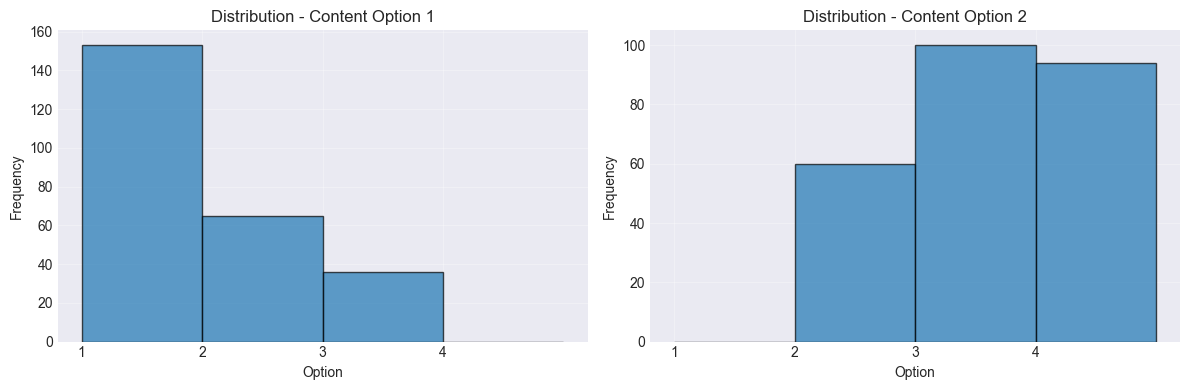

In [16]:
# Style
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

bins = [1, 2, 3, 4, 5]  # 

# ===== HISTOGRAM 1 =====
ax1 = axes[0]
ax1.hist(df['content_option_1'], bins=bins, edgecolor='black', alpha=0.7)
ax1.set_xticks([1, 2, 3, 4])
ax1.set_title('Distribution - Content Option 1')
ax1.set_xlabel('Option')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# ===== HISTOGRAM 2 =====
ax2 = axes[1]
ax2.hist(df['content_option_2'], bins=bins, edgecolor='black', alpha=0.7)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_title('Distribution - Content Option 2')
ax2.set_xlabel('Option')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


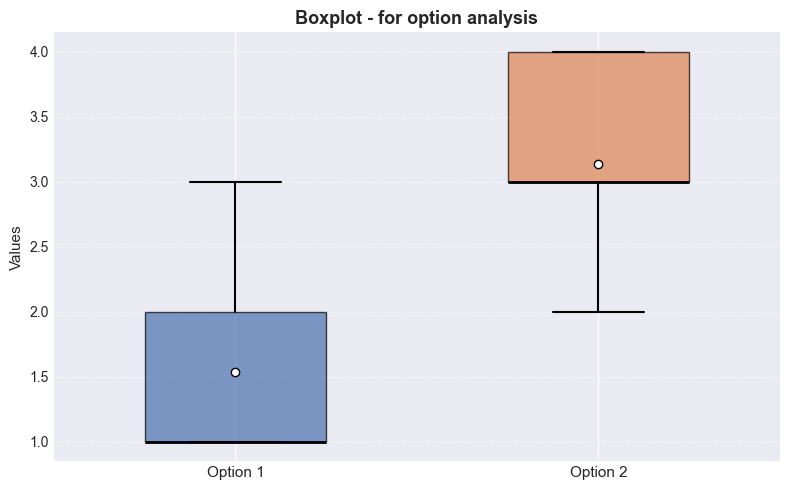


📊 Summary - Option 1
Mean:     1.54
Median:   1.00
Q1 (25%): 1.00
Q3 (75%): 2.00
Minimum:  1.00
Maximum:  3.00

📊 Summary - Option 2
Mean:     3.13
Median:   3.00
Q1 (25%): 3.00
Q3 (75%): 4.00
Minimum:  2.00
Maximum:  4.00


In [17]:
# Boxplot - With style

plt.figure(figsize=(8, 5))

data_for_box_plot_option_1 = df['content_option_1']
data_for_box_plot_option_2 = df['content_option_2']
data_for_box_plot = [data_for_box_plot_option_1, data_for_box_plot_option_2]

box = plt.boxplot(
    data_for_box_plot,
    showmeans=True,
    patch_artist=True,
    widths=0.5
)
cores = ["#4C72B0", "#DD8452"]
for patch, cor in zip(box["boxes"], cores):
    patch.set_facecolor(cor)
    patch.set_alpha(0.7)
for median in box["medians"]:
    median.set(color="black", linewidth=2)
for mean in box["means"]:
    mean.set(
        marker="o",
        markerfacecolor="white",
        markeredgecolor="black",
        markersize=6
    )
for whisker in box["whiskers"]:
    whisker.set(linewidth=1.5)
for cap in box["caps"]:
    cap.set(linewidth=1.5)
plt.title("Boxplot - for option analysis", fontsize=13, fontweight="bold")
plt.ylabel("Values", fontsize=11)
plt.xticks([1, 2], ["Option 1", "Option 2"], fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

import numpy as np

# Showing data
option_1 = df['content_option_1']
option_2 = df['content_option_2']

def statistical_summary(data, name):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    minimum = np.min(data)
    maximum = np.max(data)

    print(f"\n📊 Summary - {name}")
    print(f"Mean:     {mean:.2f}")
    print(f"Median:   {median:.2f}")
    print(f"Q1 (25%): {q1:.2f}")
    print(f"Q3 (75%): {q3:.2f}")
    print(f"Minimum:  {minimum:.2f}")
    print(f"Maximum:  {maximum:.2f}")

# Print both options
statistical_summary(option_1, "Option 1")
statistical_summary(option_2, "Option 2")

